# Recomendation System

### Import required packages

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

### Import dataset

In [2]:
df = pd.read_csv("movies_metadata.csv", low_memory=False)

In [3]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [5]:
df.shape

(45466, 6)

### Data cleaning

In [4]:
df=df[['belongs_to_collection','genres','overview','title','vote_average','vote_count']]
df.head()

,belongs_to_collection,genres,overview,title,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ...",Toy Story,7.7,5415.0
1,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...,Jumanji,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...,Grumpier Old Men,6.5,92.0
3,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...","[{'id': 35, 'name': 'Comedy'}]",Just when George Banks has recovered from his ...,Father of the Bride Part II,5.7,173.0


In [8]:
# Clean genre column.

df['genres'] = df['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

### Calculate the mean rating across all movies

In [ ]:
C = df['vote_average'].mean()
print(C)

### Calculate the minimum number of votes required.

In [10]:
m = df['vote_count'].quantile(0.90)
print(m)

160.0


### Copy all qualified movies into a new DataFrame

In [11]:
q_movies = df.copy().loc[df['vote_count'] >= m]
q_movies.shape

(4555, 6)

### Function that computes the weighted rating of each movie

In [12]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

### Define a new feature 'score' and calculate its value with 'weighted_rating()'

In [13]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

### Sort movies based on score calculated above

In [14]:
q_movies = q_movies.sort_values('score', ascending=False)

### Print the top 20 movies

In [15]:
top = q_movies[['title', 'vote_count', 'vote_average', 'score','genres']].head(20)
top

,title,vote_count,vote_average,score,genres
314,The Shawshank Redemption,8358.0,8.5,8.445869,"[Drama, Crime]"
834,The Godfather,6024.0,8.5,8.425439,"[Drama, Crime]"
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421453,"[Comedy, Drama, Romance]"
12481,The Dark Knight,12269.0,8.3,8.265477,"[Drama, Action, Crime, Thriller]"
2843,Fight Club,9678.0,8.3,8.256385,[Drama]
292,Pulp Fiction,8670.0,8.3,8.251406,"[Thriller, Crime]"
522,Schindler's List,4436.0,8.3,8.206639,"[Drama, History, War]"
23673,Whiplash,4376.0,8.3,8.205404,[Drama]
5481,Spirited Away,3968.0,8.3,8.196055,"[Fantasy, Adventure, Animation, Family]"
2211,Life Is Beautiful,3643.0,8.3,8.187171,"[Comedy, Drama]"


### Function to get top genres

In [29]:
def get_genre(data):
    genre_dict={}
    for lst in data:
        for genre in lst:
            if genre in genre_dict:
                genre_dict[genre]+=1
            else:
                genre_dict[genre]=1
    print(genre_dict)
    return genre_dict

In [30]:
genre_dict1=get_genre(top['genres'])

{'Drama': 17, 'Crime': 8, 'Comedy': 4, 'Romance': 3, 'Action': 2, 'Thriller': 4, 'History': 1, 'War': 1, 'Fantasy': 2, 'Adventure': 2, 'Animation': 2, 'Family': 1, 'Science Fiction': 1, 'Horror': 1}


### Plot top genres

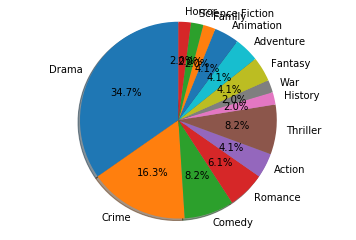

In [31]:
plt.pie(genre_dict1.values(), labels=genre_dict1.keys(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

## Content Based Recommendation System

In [11]:
df['overview'].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

In [ ]:
df1=df[['overview','title','belongs_to_collection']].copy()
df1.head()

### Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'.

In [12]:
tfidf = TfidfVectorizer(stop_words='english')

In [17]:
df1['overview'] = df1['overview'].fillna('')

### Construct the required TF-IDF matrix

In [18]:
tfidf_matrix = tfidf.fit_transform(df1['overview'])

In [19]:
tfidf_matrix.shape

(45466, 75827)

### Compute the cosine similarity matrix

In [21]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

### Construct a reverse map of indices and movie titles

In [22]:
indices = pd.Series(df1.index, index=df1['title']).drop_duplicates()
print(indices[:5])

### Function to obtain the top 10 most similar movies

In [52]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
        
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Remove movies which are from the same series
    sim_scores = [i for i in sim_scores if df1['belongs_to_collection'].iloc[i[0]]!=df1['belongs_to_collection'].iloc[idx]]
    

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df1['title'].iloc[movie_indices]

### Recommendations

In [53]:
get_recommendations('Toy Story')

24523                                       Small Fry
23843                     Andy Hardy's Blonde Trouble
29202                                      Hot Splash
43427                Andy Kaufman Plays Carnegie Hall
38476    Superstar: The Life and Times of Andy Warhol
42721    Andy Peters: Exclamation Mark Question Point
8327                                        The Champ
27206                      Life Begins for Andy Hardy
1071                            Rebel Without a Cause
36094                            Welcome to Happiness
Name: title, dtype: object

In [54]:
get_recommendations('The Godfather')

23126                                           Blood Ties
11297                                     Household Saints
34717                                    Start Liquidation
10821                                             Election
38030                             A Mother Should Be Loved
17729                                    Short Sharp Shock
26293                                   Beck 28 - Familjen
30787                                    The Sign of Venus
8653                                          Violent City
30169    Paolo Barca, maestro elementare, praticamente ...
Name: title, dtype: object

In [55]:
get_recommendations('Jumanji')

21633         Table No. 21
45253                 Quiz
41573         Snowed Under
35509             The Mend
44376    Liar Game: Reborn
17223       The Dark Angel
8801               Quintet
6166             Brainscan
30981         Turkey Shoot
9503             Word Wars
Name: title, dtype: object